In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai',context = 'notebook',ticks = True,grid =False)

In [55]:
admission_df = pd.read_csv('Admission_Predict.csv')

In [56]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [57]:
admission_df.drop('Serial No.',axis = 1,inplace = True)

In [58]:
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [59]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [60]:
df_university = admission_df.groupby(by = 'University Rating').mean()

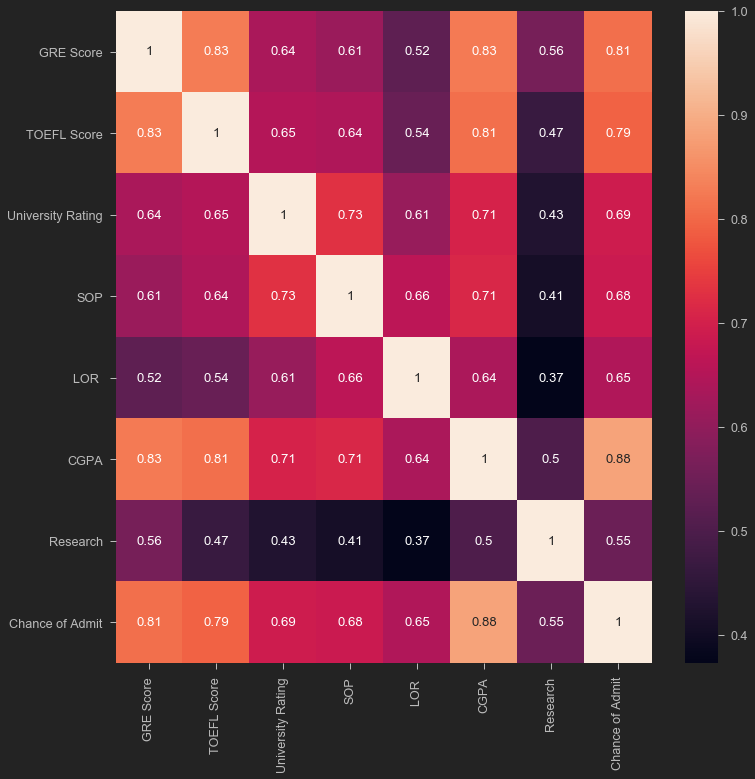

In [61]:
corr_matrix = admission_df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix,annot = True)
plt.show()

In [62]:
x = admission_df.drop(columns = ['Chance of Admit'])
y = admission_df['Chance of Admit']

In [63]:
x = np.array(x)
y = np.array(y)
y = y.reshape(-1,1)

In [64]:
# scaling data before training
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

In [67]:
#Linear Regression Model
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
accuracy_LinearRegression = LinearRegression_model.score(x_test,y_test)

In [69]:
#Artificial Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


In [70]:
#Training Artificial Neural Network
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                400       
_________________________________________________________________
activation_8 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 150)               7650      
_________________________________________________________________
activation_9 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 150)               22650     
_________________________________________________________________
activation_10 (Activation)   (None, 150)              

In [71]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [72]:
epochs_hist = ANN_model.fit(x_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Train on 340 samples, validate on 85 samples
Epoch 1/100
340/340 [==============================] - 1s 2ms/sample - loss: 0.6103 - val_loss: 0.1958
Epoch 2/100
340/340 [==============================] - 0s 285us/sample - loss: 0.3418 - val_loss: 0.1694
Epoch 3/100
340/340 [==============================] - 0s 247us/sample - loss: 0.3162 - val_loss: 0.1434
Epoch 4/100
340/340 [==============================] - 0s 270us/sample - loss: 0.3018 - val_loss: 0.1367
Epoch 5/100
340/340 [==============================] - 0s 291us/sample - loss: 0.2712 - val_loss: 0.1245
Epoch 6/100
340/340 [==============================] - 0s 270us/sample - loss: 0.2841 - val_loss: 0.1487
Epoch 7/100
340/340 [==============================] - 0s 270us/sample - loss: 0.2643 - val_loss: 0.1415
Epoch 8/100
340/340 [==============================] - 0s 276us/sample - loss: 0.2455 - val_loss: 0.1284
Epoch 9/100
340/340 [==============================] - 0s 279us/sample - loss: 0.2755 - val_loss: 0.1256
Epoch 10/100

In [73]:
result = ANN_model.evaluate(x_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

75/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [74]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

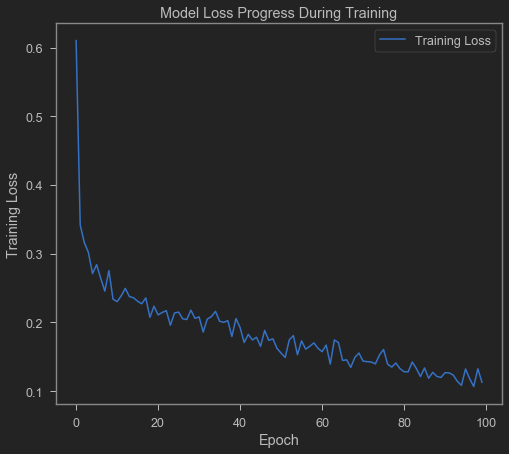

In [75]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [76]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [77]:
#Random Tree Model
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators=100,max_depth = 10)
RandomForest_model.fit(x_train,y_train)

C:\Users\Administrator\anaconda31\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

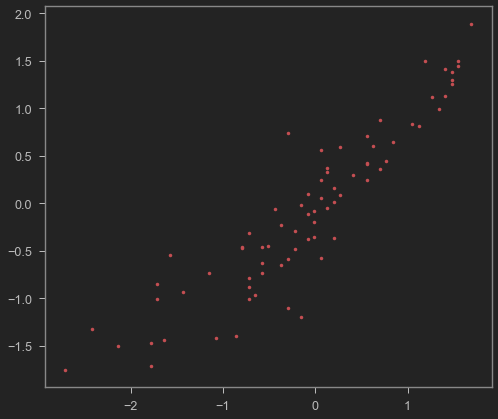

In [78]:
y_predict = LinearRegression_model.predict(x_test)
plt.plot(y_test,y_predict,'.',color = 'r')

In [79]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

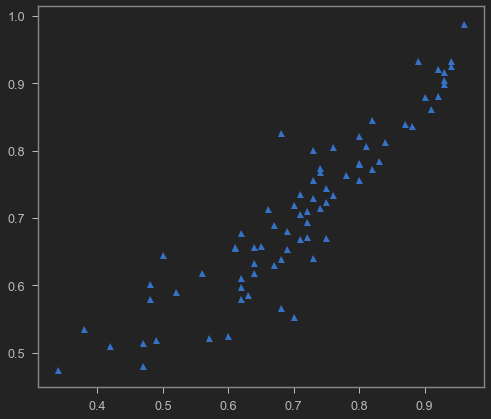

In [81]:
plt.plot(y_test_orig,y_predict_orig,'^',color = 'b')

In [82]:
k = x_test.shape[1]
n = len(x_test)
n

75

In [83]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

rmse = float(format(np.sqrt(mean_squared_error(y_test_orig,y_predict_orig)),'.3f'))
mse = mean_squared_error(y_test_orig,y_predict_orig)
mae= mean_absolute_error(y_test_orig,y_predict_orig)
r2 = r2_score(y_test_orig,y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('rmse = ',rmse,'\nMSE = ',mse,'\nMAE =',mae,'\nR2 = ',r2,'Adj R2 =',adj_r2)

rmse =  0.057 
MSE =  0.0032696500483390665 
MAE = 0.04347553482715936 
R2 =  0.8367447488925882 Adj R2 = 0.819688230120172
